# Synethesia Sentences

## TwitterScraper

Using TwitterScraper command line functions, a JSON file was generated with tweets. getTweetsText will convert this JSON file to a text document containing just the text from the tweets

In [177]:
import json

In [178]:
def getTweetsText(file_name, file_path):
    tweets = json.load(open(file_path))
    file = open(file_name + "_tweets_text.txt","w")

    for tweet in tweets:
        file.write(tweet["text"] + "\n")

    file.close()
    
    return file_name + "_tweets_text.txt"

## Markovify

Using markovify, getSentence is a simple function that will read in a txt file, and return a short sentence.

In [179]:
import markovify

In [180]:
def getSentence(text_path, n_gram):
    markovified_text = markovify.Text(open(text_path).readlines(), state_size=n_gram)
    return markovified_text.make_short_sentence(140)

## TextBlob

Using TextBlob, getSentiment is a simple function that will rate the polarity (-1 to 1) and subjectivity (0 to 1) of a given sentence.

In [181]:
from textblob import TextBlob

In [182]:
def getSentiment(sentence):
    return TextBlob(sentence).sentiment

## Translate Values

A function to map a value within one range (ex. 0.3 within -1 to 1) to another range (i.e. 1 to 10)

Credit/Source: https://stackoverflow.com/questions/1969240/mapping-a-range-of-values-to-another

In [183]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    valueScaled = float(value - leftMin) / float(leftSpan)
    
    return rightMin + (valueScaled * rightSpan)

## matplotlib

A library for creating graphics in python

In [184]:
from matplotlib import pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

### Color Maps

From https://matplotlib.org/tutorials/colors/colormaps.html, a gradient list of colors I put together from sad to happy tones.

getCmap will choose a tone based on the polarity of a text

In [185]:
GRADIENT = [plt.cm.Greys,plt.cm.Blues,plt.cm.bone,plt.cm.twilight,plt.cm.BuPu,plt.cm.YlGn,plt.cm.summer,plt.cm.autumn,plt.cm.spring,plt.cm.Wistia]

def getCmap(polarity):
    index = translate(polarity,-1,1,0,len(GRADIENT))
    return GRADIENT[int(index)]

### Shape and Color

synthesize is a function I compiled and adjusted from two main Stack Overflow threads. Based on the polarity and subjectivity of a sentence, it will construct a random shape to represent the sentence. There are 3 main parameters that effect a shapes final appearance:
- The polarity and subjectivity together define how many points to include within the shape. The more positive and subjective, the more points. The more negative and objective, the less points
- Based on the subjectivity of a sentence, the shape will either be comprised of straight (more objective) or curved (more subjective) lines
- The color of the shape is based on the polarity of the sentence. See getCmap.

Credits/Sources:
- [Create random shape/contour using matplotlib](https://stackoverflow.com/a/50732357/8395387)
- [Mathplotlib draw triangle with gradient fill](https://stackoverflow.com/a/42064723/8395387)

In [187]:
def synthesize(analysis):
    polarity = translate(analysis.polarity,-1,1,1,5)
    subjectivity = translate(analysis.subjectivity,0,1,1,5)
    n = int(polarity*subjectivity/2)
    N = n*3+1

    angles = np.linspace(0,2*np.pi,N)

    if round(analysis.subjectivity) == 0:
        codes = np.full(N,Path.LINETO)
    else:
        codes = np.full(N,Path.CURVE4)

    codes[0] = Path.MOVETO

    verts = np.stack((np.cos(angles),np.sin(angles))).T*(2*np.random.random(N))[:,None]
    verts[-1,:] = verts[0,:]
    path = Path(verts,codes)

    xlim = np.min(verts)*1.1
    ylim = np.max(verts)*1.1

    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    patch = patches.PathPatch(path, facecolor='none', lw=0)
    ax.add_patch(patch)

    Z, Z2 = np.meshgrid(np.linspace(0,2*np.pi,N),np.linspace(0,2*np.pi,N))
    im = plt.imshow(
        Z-Z2,
        interpolation='bilinear',
        cmap=getCmap(analysis.polarity),
        origin='lower',
        extent=[xlim,ylim,xlim,ylim],
        clip_path=patch,
        clip_on=True
    )
    im.set_clip_path(patch)
    ax.set_xlim(xlim, ylim)
    ax.set_ylim(xlim, ylim)

    plt.axis('off')
    plt.show()

### Putting it Together

1. Call getTweetsText, pass JSON file of tweets
2. Call getSentence, pass tweets txt file and n-gram length
3. Call getSentiment, pass sentence returned from getSentence
4. Print sentence
5. Call synthesize; this prints the sentence shape

*hands Rey an xbox controller* it's cool if you have real friends like darth vader had


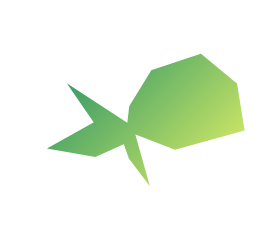

In [170]:
txt_file = getTweetsText("kylor3n","kylor3n_tweets.json")
sentence = getSentence(txt_file,2)
sentiment = getSentiment(sentence)

print(sentence)
synthesize(sentiment)